## Counterfeit Medicines Sales Prediction

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import linear_model


## Reading the file

In [2]:
df = pd.read_csv('counterfeit_train.csv')
df

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402
...,...,...,...,...,...,...,...,...,...,...,...,...
6813,OYN80,8.535,Area046,1995,204.1452,Hreplacements,mild,0.112963,DownTown,Tier 1,Small,2070.4520
6814,ACW12,20.650,Area046,1995,235.1088,Hreplacements,mild,0.131103,DownTown,Tier 1,Small,2126.3792
6815,OPM10,20.000,Area017,2005,193.6292,Antimalarial,critical,0.105096,DownTown,Tier 2,Unknown,2119.7212
6816,SLY12,10.180,Area045,2000,162.8682,Statins,mild,0.099957,DownTown,Tier 2,Unknown,1485.2138


In [77]:
print(df.info())
print("\n")
df.describe(include="all") 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          6818 non-null   object 
 1   Counterfeit_Weight   6818 non-null   object 
 2   DistArea_ID          6818 non-null   object 
 3   Active_Since         6818 non-null   int64  
 4   Medicine_MRP         6818 non-null   float64
 5   Medicine_Type        6818 non-null   object 
 6   SidEffect_Level      6818 non-null   object 
 7   Availability_rating  6818 non-null   float64
 8   Area_Type            6818 non-null   object 
 9   Area_City_Type       6818 non-null   object 
 10  Area_dist_level      6818 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 639.3+ KB
None




,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
count,6818,6818,6818,6818.000000,6818.000000,6818,6818,6818.000000,6818,6818,6818,6818.000000
unique,1557,415,10,NaN,NaN,16,2,NaN,4,3,4,NaN
top,RQS74,None,Area017,NaN,NaN,Hreplacements,mild,NaN,DownTown,Tier 3,Medium,NaN
freq,9,1166,760,NaN,NaN,976,4434,NaN,4481,2655,2203,NaN
mean,NaN,NaN,NaN,1995.836316,151.401518,NaN,NaN,0.079174,NaN,NaN,NaN,2280.583480
std,NaN,NaN,NaN,8.368979,62.203961,NaN,NaN,0.051481,NaN,NaN,NaN,1693.354404
min,NaN,NaN,NaN,1983.000000,41.790000,NaN,NaN,0.013000,NaN,NaN,NaN,146.290000
25%,NaN,NaN,NaN,1985.000000,104.509400,NaN,NaN,0.040058,NaN,NaN,NaN,933.265600
50%,NaN,NaN,NaN,1997.000000,153.195700,NaN,NaN,0.066955,NaN,NaN,NaN,1902.670400
75%,NaN,NaN,NaN,2002.000000,196.148350,NaN,NaN,0.107697,NaN,NaN,NaN,3207.638400


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          6818 non-null   object 
 1   Counterfeit_Weight   6818 non-null   object 
 2   DistArea_ID          6818 non-null   object 
 3   Active_Since         6818 non-null   int64  
 4   Medicine_MRP         6818 non-null   float64
 5   Medicine_Type        6818 non-null   object 
 6   SidEffect_Level      6818 non-null   object 
 7   Availability_rating  6818 non-null   float64
 8   Area_Type            6818 non-null   object 
 9   Area_City_Type       6818 non-null   object 
 10  Area_dist_level      6818 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 639.3+ KB


## Finding the Null value

In [79]:
df.isna().sum()

Medicine_ID            0
Counterfeit_Weight     0
DistArea_ID            0
Active_Since           0
Medicine_MRP           0
Medicine_Type          0
SidEffect_Level        0
Availability_rating    0
Area_Type              0
Area_City_Type         0
Area_dist_level        0
Counterfeit_Sales      0
dtype: int64

## Finding  the Null percentage

In [80]:
df_missing=pd.DataFrame((round(100*(df.isnull().sum()/len(df.index)), 2)), columns=['missing'])    
df_missing.sort_values(by=['missing'], ascending=False).head(20) 

,missing
Medicine_ID,0.0
Counterfeit_Weight,0.0
DistArea_ID,0.0
Active_Since,0.0
Medicine_MRP,0.0
Medicine_Type,0.0
SidEffect_Level,0.0
Availability_rating,0.0
Area_Type,0.0
Area_City_Type,0.0


## Removing the null value

In [81]:
df['Counterfeit_Weight'] = df['Counterfeit_Weight'].fillna('0')

In [82]:
df.isna().sum().sum()

0

In [34]:
df.isna().sum()

Medicine_ID            0
Counterfeit_Weight     0
DistArea_ID            0
Active_Since           0
Medicine_MRP           0
Medicine_Type          0
SidEffect_Level        0
Availability_rating    0
Area_Type              0
Area_City_Type         0
Area_dist_level        0
Counterfeit_Sales      0
dtype: int64

In [60]:
df.nunique()

Medicine_ID            1557
Counterfeit_Weight      415
DistArea_ID              10
Active_Since              9
Medicine_MRP           5097
Medicine_Type            16
SidEffect_Level           2
Availability_rating    6317
Area_Type                 4
Area_City_Type            3
Area_dist_level           4
Counterfeit_Sales      3142
dtype: int64

In [66]:
df.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
       'Counterfeit_Sales'],
      dtype='object')

In [70]:
df.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.1,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,None,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.8,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,None,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


## Visualization of the data

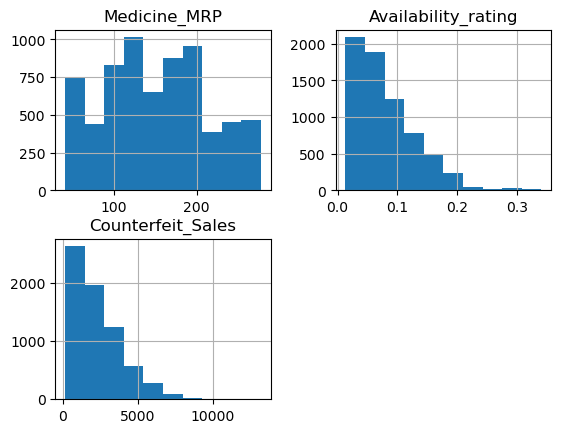

In [72]:
viz = df[['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level', 'Availability_rating', 'Area_Type','Area_dist_level','Counterfeit_Sales']]
viz.hist()
plt.show()

### Get scatter plot between dependent and independent variables

In [73]:
mask=np.random.rand(len(df)) < 0.80                   ### Uniform Random Number
train=df[mask]
test=df[~mask]   

In [76]:
for i in train[['Counterfeit_Sales', 'Medicine_MRP', 'Availability_Rating']]:
    plt.scatter(df[i],df['Availability_Rating'],color='blue')
    plt.xlabel(i)
    plt.ylabel("Counterfeit_Sales")
    plt.show()


KeyError: "['Availability_Rating'] not in index"

## Apply Linear Regression on Training data

In [47]:
coefficient=[]
intercept=[]
regress_model={}
for i in train[['Active_Since','Medicine_MRP','Availability_rating','Counterfeit_Sales']]:
    regr=linear_model.LinearRegression()
    train_x = np.asanyarray(train[[i]])
    train_y=  np.asanyarray(train[['Counterfeit_Sales']])
    regr.fit(train_x, train_y)
    regress_model[i]=regr
    print("Relation between {} & {}".format(i,"'Counterfeit_Sales'"))
    print ('Coefficients: ', regr.coef_)
    print ('Intercept: ',regr.intercept_)
    coefficient.append(regr.coef_)              ## coefficient is considered as slope
    intercept.append(regr.intercept_)           ## intercept is considered as the line equation( y= mx +c)
    
    print('\n')

Relation between Active_Since & 'Counterfeit_Sales'
Coefficients:  [[-7.8805978]]
Intercept:  [18010.65956644]


Relation between Medicine_MRP & 'Counterfeit_Sales'
Coefficients:  [[15.56283088]]
Intercept:  [-78.0115684]


Relation between Availability_rating & 'Counterfeit_Sales'
Coefficients:  [[-4089.55495111]]
Intercept:  [2607.74611459]


Relation between Counterfeit_Sales & 'Counterfeit_Sales'
Coefficients:  [[1.]]
Intercept:  [-9.09494702e-13]




## Use regression parameter to model linear equation

(5526,)
(5526,)


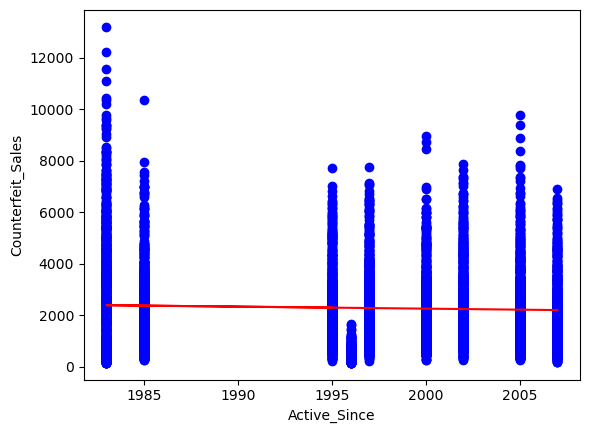

(5526,)
(5526,)


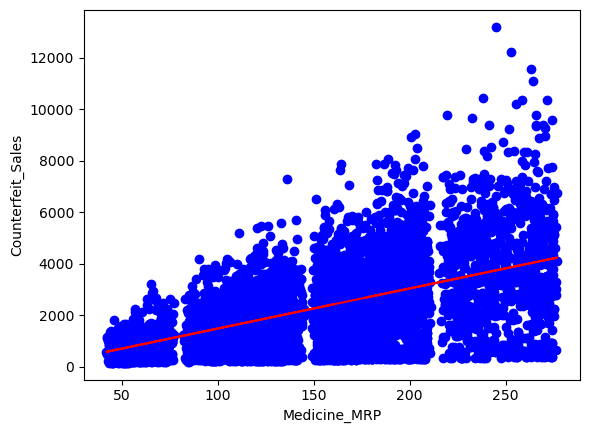

(5526,)
(5526,)


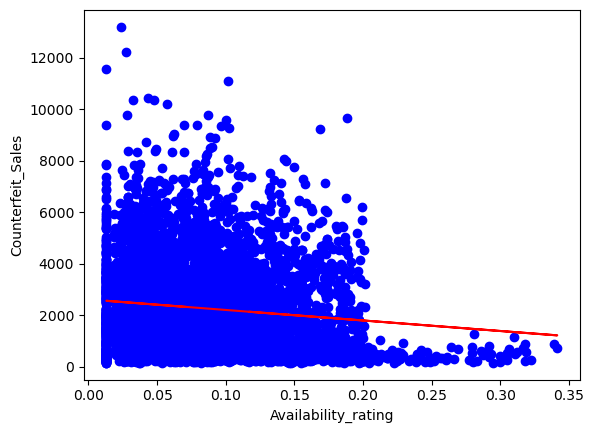

(5526,)
(5526,)


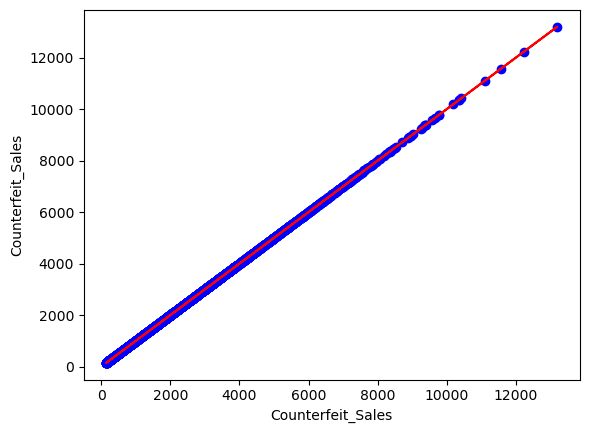

In [50]:
j=0
for i in train[['Active_Since','Medicine_MRP','Availability_rating','Counterfeit_Sales']]:
    plt.scatter(train[i], train['Counterfeit_Sales'],  color='blue')
    x=train[i].values
    print(x.shape)
    y=coefficient[j][0]*x + intercept[j]
    print(y.shape)
    l=len(y)
    y=np.reshape(y,(l,))
    plt.plot(x, y, '-r')
    plt.xlabel(i)
    plt.ylabel("Counterfeit_Sales")
    plt.show()
    j=j+1

## Evaluate model performance on test data


In [51]:
from sklearn.metrics import r2_score

for i in train[['Active_Since','Medicine_MRP','Availability_rating','Counterfeit_Sales']]:
    test_x = np.asanyarray(test[[i]])
    test_y = np.asanyarray(test[['Counterfeit_Sales']])
    test_y_ = regress_model[i].predict(test_x)
    print("Fitting Error between {} & {}".format(i,"'Counterfeit_Sales'"))
    print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
    print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
    print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
    print('\n')

Fitting Error between Active_Since & 'Counterfeit_Sales'
Mean absolute error: 1311.07
Residual sum of squares (MSE): 2695095.79
R2-score: -614.83


Fitting Error between Medicine_MRP & 'Counterfeit_Sales'
Mean absolute error: 977.49
Residual sum of squares (MSE): 1733137.57
R2-score: -0.86


Fitting Error between Availability_rating & 'Counterfeit_Sales'
Mean absolute error: 1302.04
Residual sum of squares (MSE): 2658246.90
R2-score: -60.78


Fitting Error between Counterfeit_Sales & 'Counterfeit_Sales'
Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: 1.00


